In [1]:
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:

with open('Dating_app_clean.pkl', 'rb') as file:
    df = pickle.load(file)

In [3]:
df.head()

,genderLooking,age,name,counts_details,counts_pictures,counts_profileVisits,counts_kisses,counts_fans,counts_g,flirtInterests_chat,...,lang_it,lang_es,lang_pt,isVerified,shareProfileEnabled,lastOnline,hasBirthday,crypt,whazzup,userId
0,M,25,daeni,1.00,4,8279,239,0.0,3.0,1,...,0,0,0,0,1.0,25/04/2015 20:43,0,0.0,Nur tote fische schwimmen mit dem strom,4e3842f79b70e7ea57000064
1,M,22,italiana 92,0.85,5,663,13,0.0,0.0,1,...,1,0,0,0,1.0,26/04/2015 09:19,0,0.0,Primaveraaa3,4e3d34bf5d2bce7b160006a3
2,M,21,Lauraaa,0.00,4,1369,88,0.0,2.0,0,...,0,0,0,0,1.0,06/04/2015 14:24,0,0.0,nan,4ec96c090dc82cb25d00000a
3,none,20,Qqkwmdowlo,0.12,3,22187,1015,2.0,3.0,1,...,0,0,0,0,1.0,07/04/2015 11:21,0,0.0,Je pense donc je suis Instagram quedev,4eef8b81ebf2c8f64000000c
4,M,21,schaessie 3,0.15,12,35262,1413,9.0,12.0,1,...,0,0,0,0,1.0,06/04/2015 14:25,0,0.0,Instagram JESSSIESCH,4ef3cc5aa9d0b3d07d000017


In [4]:
df.set_index('userId', inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4008 entries, 4e3842f79b70e7ea57000064 to CRYz85gM+yTETN5FonrExXNHyDuwarWygCPnUrwnan7Uet6hf+US6oXyQ==
Data columns (total 35 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   genderLooking           4008 non-null   string 
 1   age                     4008 non-null   int64  
 2   name                    4008 non-null   string 
 3   counts_details          4008 non-null   float64
 4   counts_pictures         4008 non-null   int64  
 5   counts_profileVisits    4008 non-null   int64  
 6   counts_kisses           4008 non-null   int64  
 7   counts_fans             4008 non-null   float64
 8   counts_g                4008 non-null   string 
 9   flirtInterests_chat     4008 non-null   int64  
 10  flirtInterests_friends  4008 non-null   int64  
 11  flirtInterests_date     4008 non-null   int64  
 12  country                 4008 non-null   string 
 13  city                

In [6]:
# Convert the 'dates' column to datetime format
df['lastOnline'] = pd.to_datetime(df['lastOnline'])

# Extract day, month, and year into separate columns
df['lastOnlineday'] = df['lastOnline'].dt.day
df['lastOnlinemonth'] = df['lastOnline'].dt.month
df['lastOnlineyear'] = df['lastOnline'].dt.year

df.lastOnlineyear.unique()


array([2015, 1970], dtype=int64)

In [7]:
df.lastOnlinemonth.unique()

array([ 4,  6,  7,  8,  3, 11,  5,  1, 12,  2, 10,  9], dtype=int64)

In [8]:
df.lastOnlineday.unique()

array([25, 26,  4, 27, 24,  5, 21, 19, 23, 28, 20, 18, 29, 22, 14, 30, 15,
       13, 31, 17, 16,  1], dtype=int64)

In [9]:
del df['lastOnlineyear']
del df['lastOnline']


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4008 entries, 4e3842f79b70e7ea57000064 to CRYz85gM+yTETN5FonrExXNHyDuwarWygCPnUrwnan7Uet6hf+US6oXyQ==
Data columns (total 36 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   genderLooking           4008 non-null   string 
 1   age                     4008 non-null   int64  
 2   name                    4008 non-null   string 
 3   counts_details          4008 non-null   float64
 4   counts_pictures         4008 non-null   int64  
 5   counts_profileVisits    4008 non-null   int64  
 6   counts_kisses           4008 non-null   int64  
 7   counts_fans             4008 non-null   float64
 8   counts_g                4008 non-null   string 
 9   flirtInterests_chat     4008 non-null   int64  
 10  flirtInterests_friends  4008 non-null   int64  
 11  flirtInterests_date     4008 non-null   int64  
 12  country                 4008 non-null   string 
 13  city                

In [11]:
import nltk
from wordcloud import WordCloud

In [12]:
text=df['whazzup'].astype('string')
text

userId
4e3842f79b70e7ea57000064                                       Nur tote fische schwimmen mit dem strom
4e3d34bf5d2bce7b160006a3                                                                  Primaveraaa3
4ec96c090dc82cb25d00000a                                                                           nan
4eef8b81ebf2c8f64000000c                                       Je pense donc je suis  Instagram quedev
4ef3cc5aa9d0b3d07d000017                                                          Instagram JESSSIESCH
                                                                           ...                        
CRYTwVREzFby1Ki2S3EoCsl7inIHicExbg2dTMUAK70UsZ...                                ruhig shriebe biss ni
CRYZDaE0D8DGRtcDVZrAsLUXB5fwMI8mU2VCSVG3tMBMiR...              tous des cratures de Dieu ya pas de VIP
CRYnzOCr0PuH4s9u8epkDnL5qFZN+S2EvYtoDz9kkTHP54...    Je ne suis pas compliqueje sais ce que je veux...
CRYohLWFV8BkxZIvOom42Cwo3ysdViv+oTosUAOQkLKHTM...                 

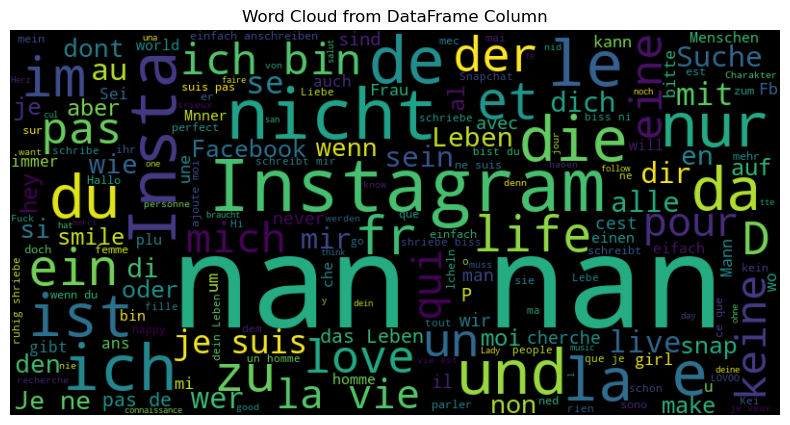

In [13]:
#creating the word cloud
text_data = text.str.cat(sep=' ')

wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text_data)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud from DataFrame Column")
plt.show()

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4008 entries, 4e3842f79b70e7ea57000064 to CRYz85gM+yTETN5FonrExXNHyDuwarWygCPnUrwnan7Uet6hf+US6oXyQ==
Data columns (total 36 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   genderLooking           4008 non-null   string 
 1   age                     4008 non-null   int64  
 2   name                    4008 non-null   string 
 3   counts_details          4008 non-null   float64
 4   counts_pictures         4008 non-null   int64  
 5   counts_profileVisits    4008 non-null   int64  
 6   counts_kisses           4008 non-null   int64  
 7   counts_fans             4008 non-null   float64
 8   counts_g                4008 non-null   string 
 9   flirtInterests_chat     4008 non-null   int64  
 10  flirtInterests_friends  4008 non-null   int64  
 11  flirtInterests_date     4008 non-null   int64  
 12  country                 4008 non-null   string 
 13  city                

In [15]:
user_locations= df.whazzup.groupby(df['country'])
user_locations.count()

country
AR          1
AT         20
AU          2
BA          3
BE          7
BR          2
CA          2
CF          1
CH       1657
CZ          1
DE       1468
ES          6
ET          1
FR        646
GB          2
HU          1
ID          1
IN          1
IT        138
JM          1
LI          1
LR          1
LU          5
NL          2
Other      16
PE          1
PH          1
RO          2
RU          2
SC          2
TR         10
UA          1
US          3
Name: whazzup, dtype: int64

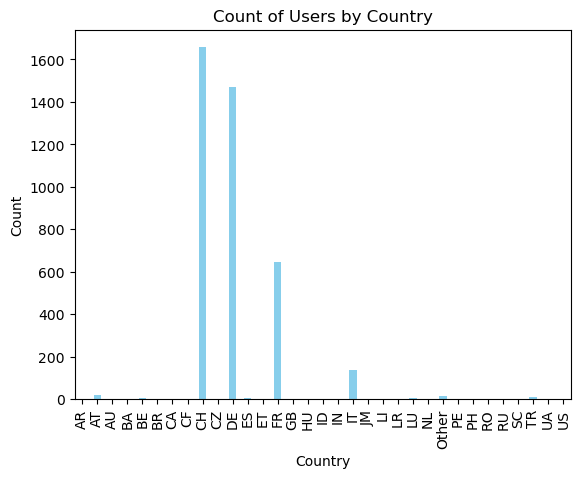

In [16]:
whazzup_counts = user_locations.count()

# Plot the counts
whazzup_counts.plot(kind='bar', color='skyblue')

# Customize the plot
plt.title('Count of Users by Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=90)

# Show the plot
plt.show()


#most users are from Switzerland, Germany and France
#41% Switzerland
# 36% Germany
# 16% France

In [17]:
user_french = df.whazzup.groupby(df['lang_fr'] == 1)

# Count the occurrences of each 'whazzup' for French-speaking users
french_whazzup_counts = user_french.count()

# Print the result
print(french_whazzup_counts)

lang_fr
False    2859
True     1149
Name: whazzup, dtype: int64


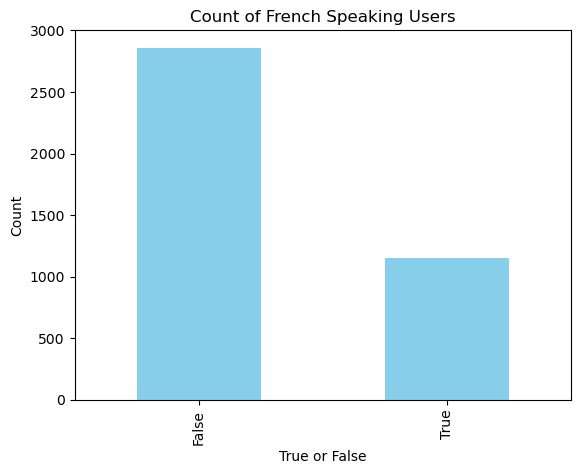

In [18]:
french_whazzup_counts.plot(kind='bar', color='skyblue')

# Customize the plot
plt.title('Count of French Speaking Users')
plt.xlabel('True or False')
plt.ylabel('Count')
plt.xticks(rotation=90)

# Show the plot
plt.show()

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4008 entries, 4e3842f79b70e7ea57000064 to CRYz85gM+yTETN5FonrExXNHyDuwarWygCPnUrwnan7Uet6hf+US6oXyQ==
Data columns (total 36 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   genderLooking           4008 non-null   string 
 1   age                     4008 non-null   int64  
 2   name                    4008 non-null   string 
 3   counts_details          4008 non-null   float64
 4   counts_pictures         4008 non-null   int64  
 5   counts_profileVisits    4008 non-null   int64  
 6   counts_kisses           4008 non-null   int64  
 7   counts_fans             4008 non-null   float64
 8   counts_g                4008 non-null   string 
 9   flirtInterests_chat     4008 non-null   int64  
 10  flirtInterests_friends  4008 non-null   int64  
 11  flirtInterests_date     4008 non-null   int64  
 12  country                 4008 non-null   string 
 13  city                

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC

In [21]:
y=df['counts_profileVisits']
X = df.drop(columns=['counts_profileVisits','whazzup','genderLooking', 'name','country','city','locationCity','counts_g'])

In [22]:
lasso = Lasso(alpha=0.01).fit(X, y)
lasso_selected = (np.abs(lasso.coef_) > 0).astype(int)

In [23]:

svm = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X, y)
svm_selected = (np.abs(svm.coef_[0]) > 0).astype(int)

In [24]:
X_sample = X.sample(frac=0.1, random_state=42)  # 10% of the data
y_sample = y.sample(frac=0.1, random_state=42)

gb = GradientBoostingClassifier().fit(X_sample, y_sample)
gb_selected = (gb.feature_importances_ > 0).astype(int)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4008 entries, 4e3842f79b70e7ea57000064 to CRYz85gM+yTETN5FonrExXNHyDuwarWygCPnUrwnan7Uet6hf+US6oXyQ==
Data columns (total 36 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   genderLooking           4008 non-null   string 
 1   age                     4008 non-null   int64  
 2   name                    4008 non-null   string 
 3   counts_details          4008 non-null   float64
 4   counts_pictures         4008 non-null   int64  
 5   counts_profileVisits    4008 non-null   int64  
 6   counts_kisses           4008 non-null   int64  
 7   counts_fans             4008 non-null   float64
 8   counts_g                4008 non-null   string 
 9   flirtInterests_chat     4008 non-null   int64  
 10  flirtInterests_friends  4008 non-null   int64  
 11  flirtInterests_date     4008 non-null   int64  
 12  country                 4008 non-null   string 
 13  city                

In [26]:
rf = RandomForestClassifier().fit(X_sample, y_sample)

# Select features with importance greater than 0
rf_selected = (rf.feature_importances_ > 0).astype(int)

print(rf_selected)


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [27]:

# Create a DataFrame to store results
selection_df = pd.DataFrame({
    'Feature': X.columns,
    'Lasso': lasso_selected,
    'SVM': svm_selected,
    'GradientBoost': gb_selected,
    'RandomForest': rf_selected
})

# Sum the number of selections for each feature
selection_df['Sum'] = selection_df[['Lasso', 'SVM', 'GradientBoost', 'RandomForest']].sum(axis=1)

# Output the results
print(selection_df)

                   Feature  Lasso  SVM  GradientBoost  RandomForest  Sum
0                      age      1    1              1             1    4
1           counts_details      1    0              1             1    3
2          counts_pictures      1    1              1             1    4
3            counts_kisses      1    1              1             1    4
4              counts_fans      1    0              1             1    3
5      flirtInterests_chat      1    0              1             1    3
6   flirtInterests_friends      1    0              1             1    3
7      flirtInterests_date      1    0              1             1    3
8                 distance      1    1              1             1    4
9              isFlirtstar      1    0              1             1    3
10           isHighlighted      0    0              1             1    2
11                isMobile      1    0              1             1    3
12                   isNew      1    0             

In [28]:
final_var = selection_df[selection_df['Sum'] >3]['Feature'].tolist()

final_var


['age', 'counts_pictures', 'counts_kisses', 'distance', 'lastOnlineday']

In [29]:
df_model = df[final_var].copy()
df_model['counts_profileVisits'] = df['counts_profileVisits'].copy()

# Output the result to verify
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4008 entries, 4e3842f79b70e7ea57000064 to CRYz85gM+yTETN5FonrExXNHyDuwarWygCPnUrwnan7Uet6hf+US6oXyQ==
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   4008 non-null   int64  
 1   counts_pictures       4008 non-null   int64  
 2   counts_kisses         4008 non-null   int64  
 3   distance              4008 non-null   float64
 4   lastOnlineday         4008 non-null   int64  
 5   counts_profileVisits  4008 non-null   int64  
dtypes: float64(1), int64(5)
memory usage: 348.2 KB


In [30]:
from sklearn.feature_selection import SelectKBest, f_classif

# Calculate F-values and p-values
f_values, p_values = f_classif(X, y)

# Create a DataFrame to display F-values and p-values for each feature
feature_scores = pd.DataFrame({'Feature': X.columns, 'F-Value': f_values, 'P-Value': p_values})

# Print the DataFrame
print(feature_scores)

                   Feature     F-Value        P-Value
0                      age    1.104139   1.927625e-02
1           counts_details    0.964010   7.819550e-01
2          counts_pictures    3.748473  4.390189e-141
3            counts_kisses  180.141872   0.000000e+00
4              counts_fans    1.391688   4.721832e-12
5      flirtInterests_chat    0.974465   7.091394e-01
6   flirtInterests_friends    1.036617   2.264977e-01
7      flirtInterests_date    1.069914   7.893689e-02
8                 distance    2.185386   3.077550e-55
9              isFlirtstar    1.219117   1.910575e-05
10           isHighlighted    1.219117   1.910575e-05
11                isMobile    0.880591   9.965514e-01
12                   isNew    1.491622   1.132089e-16
13                isOnline    1.288346   7.643606e-08
14                   isVIP    2.064148   3.696672e-48
15              lang_count    1.436013   4.808940e-14
16                 lang_fr    0.959281   8.113331e-01
17                 lang_en  

In [31]:
# Select the top 2 features based on F-value
top_features = feature_scores.nlargest(15, 'F-Value')

# Print the 2 best features
print(top_features)

                Feature     F-Value        P-Value
3         counts_kisses  180.141872   0.000000e+00
2       counts_pictures    3.748473  4.390189e-141
8              distance    2.185386   3.077550e-55
14                isVIP    2.064148   3.696672e-48
25                crypt    1.959407   4.410264e-42
22           isVerified    1.691327   5.465822e-27
17              lang_en    1.649679   9.524656e-25
23  shareProfileEnabled    1.581598   3.554682e-21
19              lang_it    1.499360   4.764389e-17
12                isNew    1.491622   1.132089e-16
15           lang_count    1.436013   4.808940e-14
20              lang_es    1.402195   1.625167e-12
4           counts_fans    1.391688   4.721832e-12
13             isOnline    1.288346   7.643606e-08
26        lastOnlineday    1.269189   3.844018e-07


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4008 entries, 4e3842f79b70e7ea57000064 to CRYz85gM+yTETN5FonrExXNHyDuwarWygCPnUrwnan7Uet6hf+US6oXyQ==
Data columns (total 36 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   genderLooking           4008 non-null   string 
 1   age                     4008 non-null   int64  
 2   name                    4008 non-null   string 
 3   counts_details          4008 non-null   float64
 4   counts_pictures         4008 non-null   int64  
 5   counts_profileVisits    4008 non-null   int64  
 6   counts_kisses           4008 non-null   int64  
 7   counts_fans             4008 non-null   float64
 8   counts_g                4008 non-null   string 
 9   flirtInterests_chat     4008 non-null   int64  
 10  flirtInterests_friends  4008 non-null   int64  
 11  flirtInterests_date     4008 non-null   int64  
 12  country                 4008 non-null   string 
 13  city                

In [33]:

label_encoders = {}
for column in ['genderLooking', 'name','country','city','locationCity']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le
df

,genderLooking,age,name,counts_details,counts_pictures,counts_profileVisits,counts_kisses,counts_fans,counts_g,flirtInterests_chat,...,lang_it,lang_es,lang_pt,isVerified,shareProfileEnabled,hasBirthday,crypt,whazzup,lastOnlineday,lastOnlinemonth
userId,,,,,,,,,,,,,,,,,,,,,
4e3842f79b70e7ea57000064,1,25,2078,1.00,4,8279,239,0.0,3.0,1,...,0,0,0,0,1.0,0,0.0,Nur tote fische schwimmen mit dem strom,25,4
4e3d34bf5d2bce7b160006a3,1,22,2202,0.85,5,663,13,0.0,0.0,1,...,1,0,0,0,1.0,0,0.0,Primaveraaa3,26,4
4ec96c090dc82cb25d00000a,1,21,931,0.00,4,1369,88,0.0,2.0,0,...,0,0,0,0,1.0,0,0.0,nan,4,6
4eef8b81ebf2c8f64000000c,3,20,1470,0.12,3,22187,1015,2.0,3.0,1,...,0,0,0,0,1.0,0,0.0,Je pense donc je suis Instagram quedev,4,7
4ef3cc5aa9d0b3d07d000017,1,21,2608,0.15,12,35262,1413,9.0,12.0,1,...,0,0,0,0,1.0,0,0.0,Instagram JESSSIESCH,4,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CRYTwVREzFby1Ki2S3EoCsl7inIHicExbg2dTMUAK70UsZ...,3,23,503,0.96,8,8682,141,0.0,0,1,...,0,0,0,0,0.0,0,1.0,ruhig shriebe biss ni,4,6
CRYZDaE0D8DGRtcDVZrAsLUXB5fwMI8mU2VCSVG3tMBMiR...,3,24,1269,1.00,7,5993,506,0.0,0,0,...,1,0,0,1,0.0,0,1.0,tous des cratures de Dieu ya pas de VIP,4,7
CRYnzOCr0PuH4s9u8epkDnL5qFZN+S2EvYtoDz9kkTHP54...,3,21,1256,0.92,5,300,19,0.0,0,1,...,0,0,0,0,0.0,0,1.0,Je ne suis pas compliqueje sais ce que je veux...,4,7


In [39]:
columns_to_convert = ['genderLooking', 'name', 'country','city','locationCity','counts_g']  # replace with your column names
for col in columns_to_convert:
    df[col] = df[col].astype('category')

In [35]:
del df['whazzup']

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4008 entries, 4e3842f79b70e7ea57000064 to CRYz85gM+yTETN5FonrExXNHyDuwarWygCPnUrwnan7Uet6hf+US6oXyQ==
Data columns (total 35 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   genderLooking           4008 non-null   category
 1   age                     4008 non-null   int64   
 2   name                    4008 non-null   category
 3   counts_details          4008 non-null   float64 
 4   counts_pictures         4008 non-null   int64   
 5   counts_profileVisits    4008 non-null   int64   
 6   counts_kisses           4008 non-null   int64   
 7   counts_fans             4008 non-null   float64 
 8   counts_g                4008 non-null   category
 9   flirtInterests_chat     4008 non-null   int64   
 10  flirtInterests_friends  4008 non-null   int64   
 11  flirtInterests_date     4008 non-null   int64   
 12  country                 4008 non-null   category
 13  city 

In [41]:
import pickle
#Write a pickle file
with open('Dating_app_feat_eng.pkl', 'wb') as f:
    pickle.dump(df, f)

print("Dating_app_feat_eng")

Dating_app_feat_eng
